In [75]:
%matplotlib notebook
import os
import h5py
import numpy as np
import json
import matplotlib.pyplot as plt
import cv2

In [76]:
train = True

if train:
    path = test_path = os.path.abspath('../dataset/')    
else:
    path = train_path = os.path.abspath('../dataset/')

Read dataset from h5py file, there are three keys in the dataset, which we extract into a list of lists

In [84]:
h5 = h5py.File(os.path.join(path, 'coco_train_dataset.h5')) # use coco_val_dataset.h5 for validation 
dataset, images, masks = [h5["dataset"], h5['images'], h5['masks']]

In [102]:
for key in dataset.keys():
    datadict = json.loads(dataset[key].value) # labeling for the image
    debug = json.loads(dataset[key].attrs['meta']) # attributes about the image
    print(datadict.keys())
    print(debug.keys())
    img = images[datadict['image']].value # get the image
    print(np.shape(img))
    
    mask_miss = None

    
    # conver the image using some magic... honestly what the fuck is going on here
    if len(img.shape)==2 and img.shape[1]==1:
        img = cv2.imdecode(img, flags=-1) 
        # somehow this converts a 1d array into the correct dimensions...

    if img.shape[2]>3: # idk if this ever gets hit
        mask_miss = img[:, :, 3]
        img = img[:, :, 0:3]
        
    if mask_miss is None:
        if masks is not None: # if we supplied masks
            mask_miss = masks[datadict['image']].value
            if len(mask_miss.shape) == 2 and mask_miss.shape[1]==1:
                mask_miss = cv2.imdecode(mask_miss, flags = -1)

    if mask_miss is None:
        mask_miss = np.full((img.shape[0], img.shape[1]), fill_value=255, dtype=np.uint8)
    break

dict_keys(['image', 'joints', 'objpos', 'scale_provided'])
dict_keys(['dataset', 'isValidation', 'img_width', 'img_height', 'image_id', 'annolist_index', 'img_path', 'objpos', 'joints', 'scale_provided', 'people_index', 'numOtherPeople', 'count'])
(118275, 1)


<IPython.core.display.Javascript object>


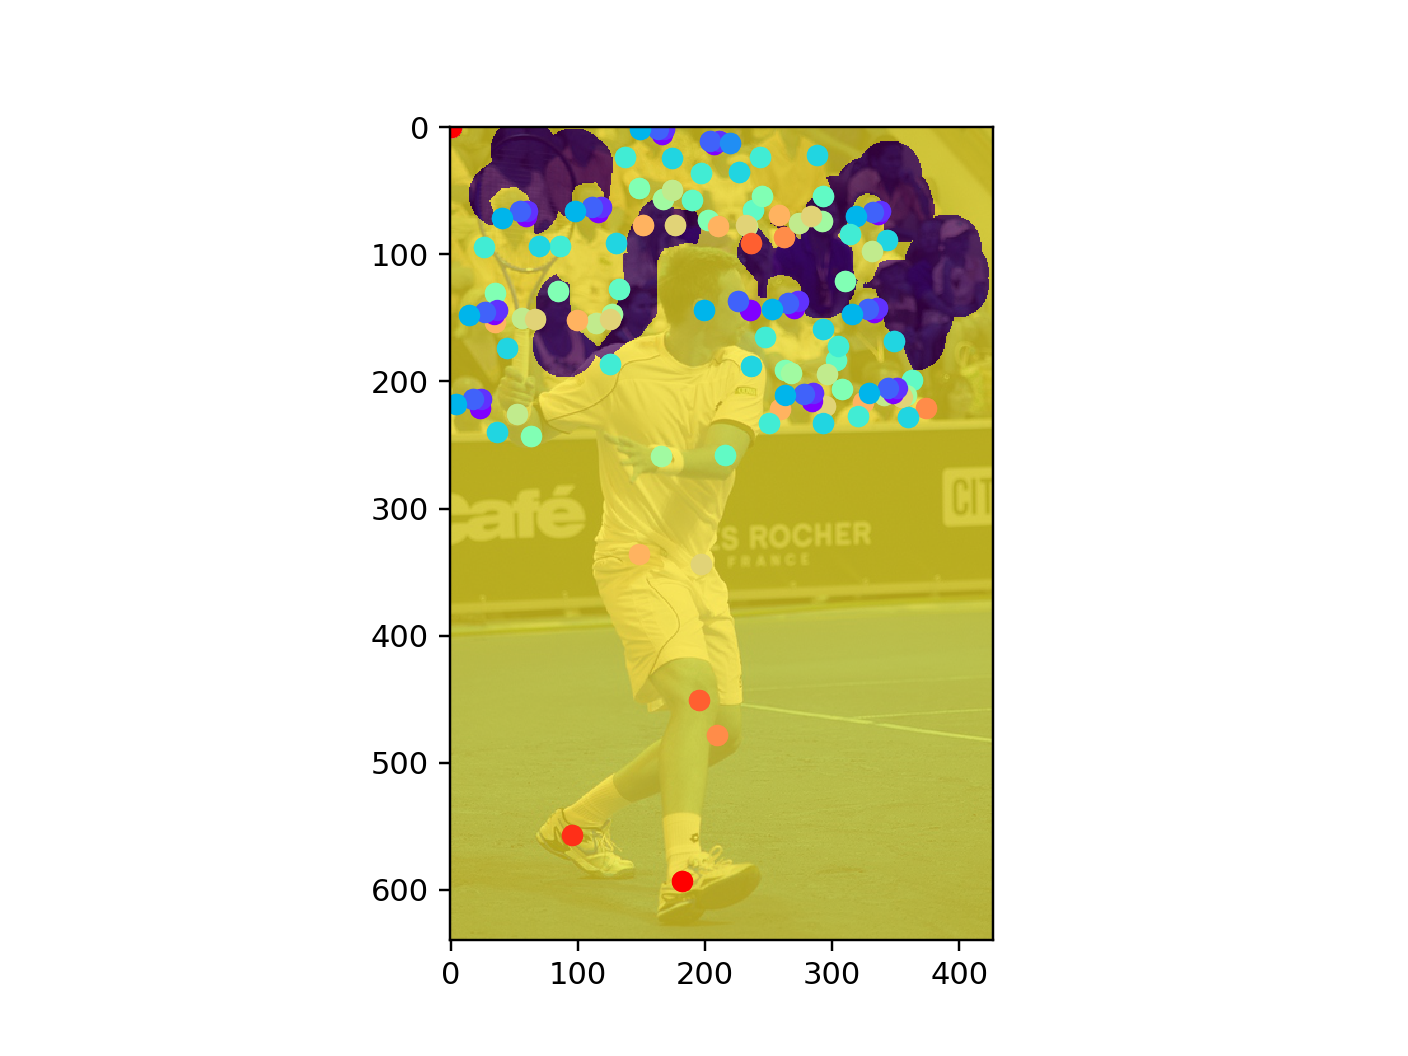

In [137]:
plt.imshow(img)
plt.imshow(mask_miss, alpha=.9)
plt.show()

In [139]:
import itertools
import matplotlib.cm as cm


joint_uvd = np.array(datadict['joints'])
jnt_uvd = np.squeeze(joint_uvd) # joint u, v, depth data
n = np.size(jnt_uvd,1) # number of joints
print(n)
print(np.shape(jnt_uvd))
jnt_scales = 20 *np.ones(n)
jnt_colors = itertools.cycle(cm.rainbow(np.linspace(0, 1, np.size(jnt_uvd,1)))) # random colors
plt.imshow(img) # display the image
# display the x, y, scale, and color of joints 
for person in jnt_uvd[:, :, 0:2]:
    for x, y in person:
        plt.scatter(x, y, color=next(jnt_colors))
plt.imshow(mask_miss, alpha=.7)
plt.show()

17
(13, 17, 3)


In [125]:
np.size(jnt_uvd,1)

17

In [135]:
for person in jnt_uvd[:, :, 0:2]:
    for x, y in person:
        print(x, y)
    break

235.0 144.0
0.0 0.0
226.0 137.0
0.0 0.0
199.0 144.0
236.0 188.0
125.0 186.0
216.0 258.0
63.0 243.0
165.0 259.0
52.0 226.0
197.0 344.0
148.0 336.0
209.0 478.0
195.0 451.0
95.0 557.0
182.0 593.0


SyntaxError: invalid syntax (<ipython-input-143-60b568c5cc3f>, line 1)